# 입문자를 위한, 파이썬/R 데이터 분석      

## Part(1) - Day07  :

]

## Today's mission

- 데이터베이스 개념정리 : DBMS, DDL, DML, DCL

- SQLite 활용 

- 실습 (1) 주식 데이터 수집 및 DB 적재

- 실습 (2) DB 활용: SQLite 기준

- [참고] SQLAlchemy 소개


## 공지
- (미니 프로젝트) 코로나 과거 데이터 추이분석 및 예측
  - 지금까지 배운 판다스 데이터 처리가 목적
  - 팀 구성하여 가능
  - 마감 :1주일 뒤 제출 및 발표

]

### 데이터베이스 개념정리

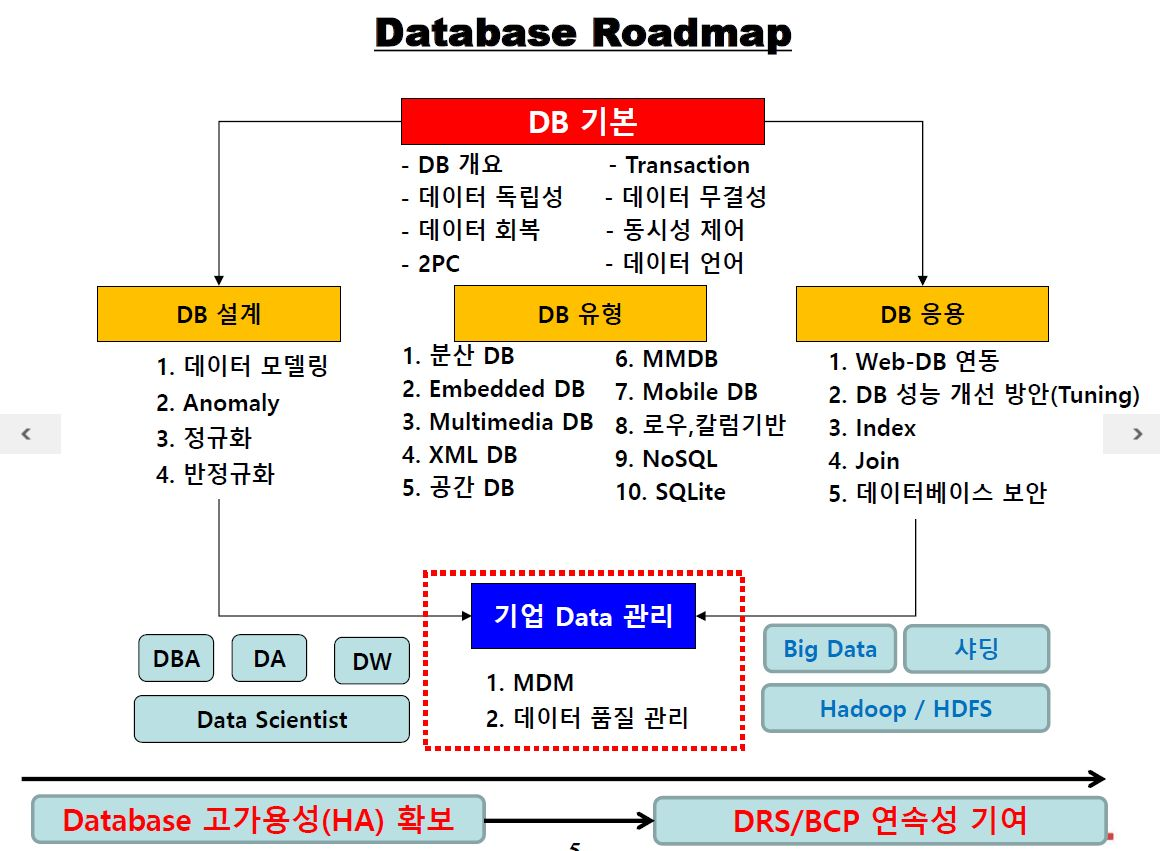

- Data Recovery(데이터복구)
- Two Phase Commit : https://weicomes.tistory.com/378 
- Anomaly : https://wkdtjsgur100.github.io/anomaly/
- 정규화 vs 반정규화 : https://owlyr.tistory.com/20
- MMDB : https://o-m-i.tistory.com/584
- NoSQL : https://www.samsungsds.com/kr/insights/1232564_4627.html
- 샤딩 : https://nesoy.github.io/articles/2018-05/Database-Shard
- 하둡 / HDFS : https://yeomko.tistory.com/38
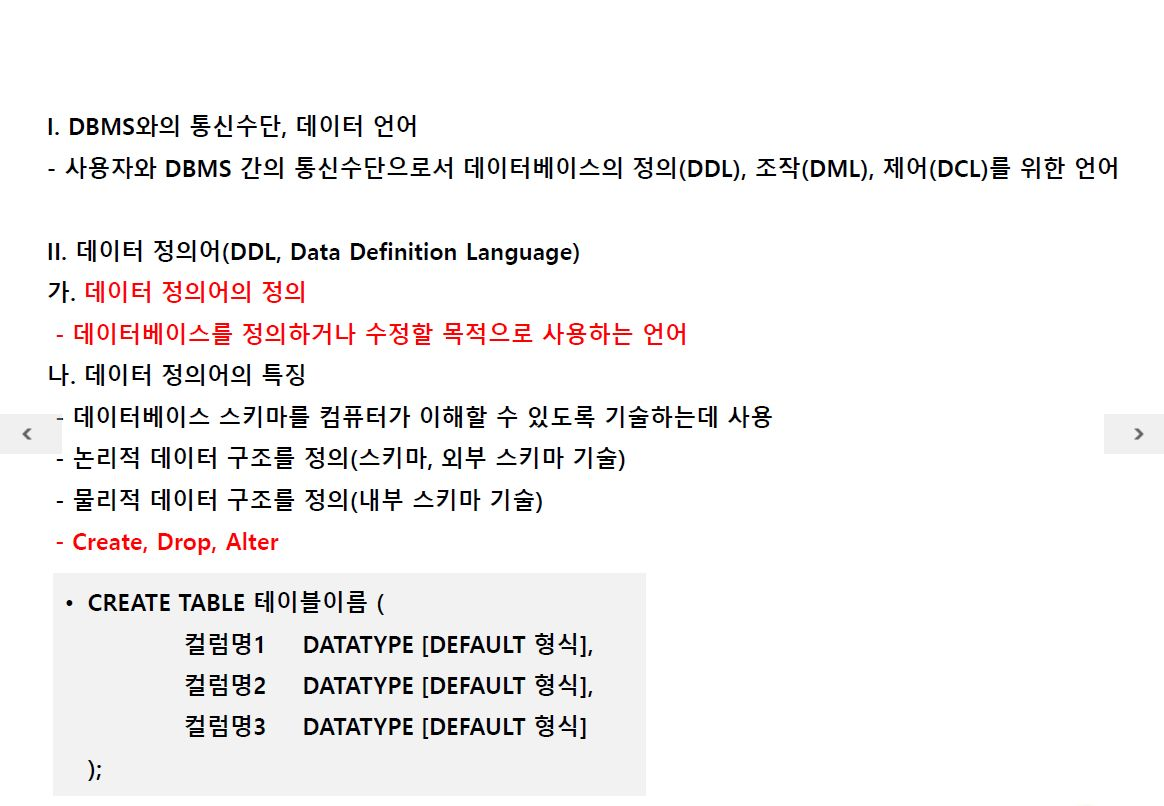
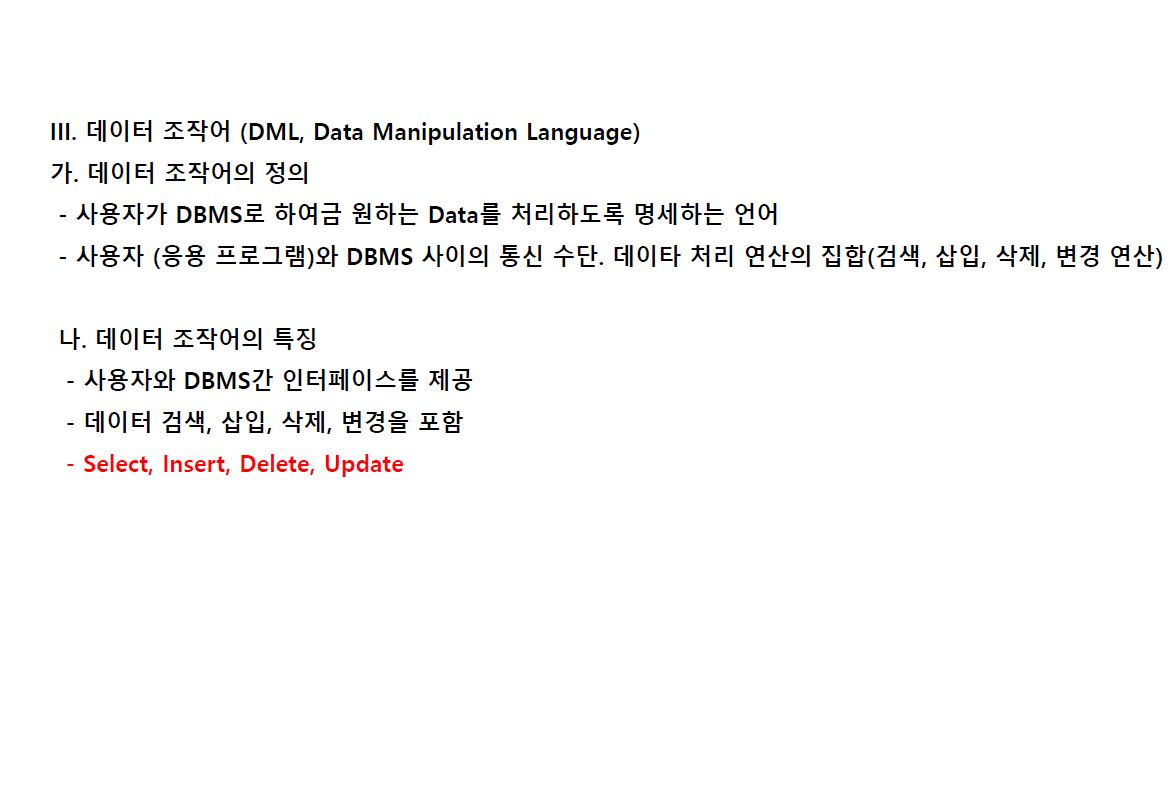
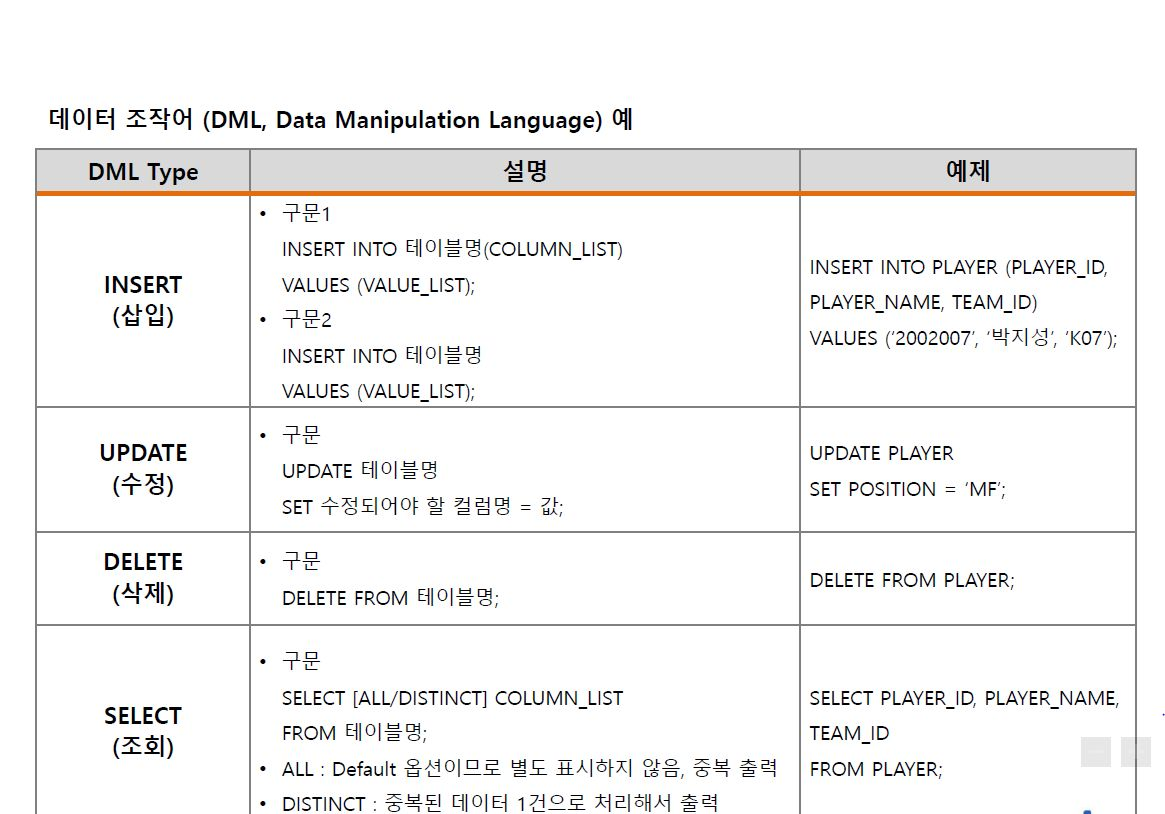
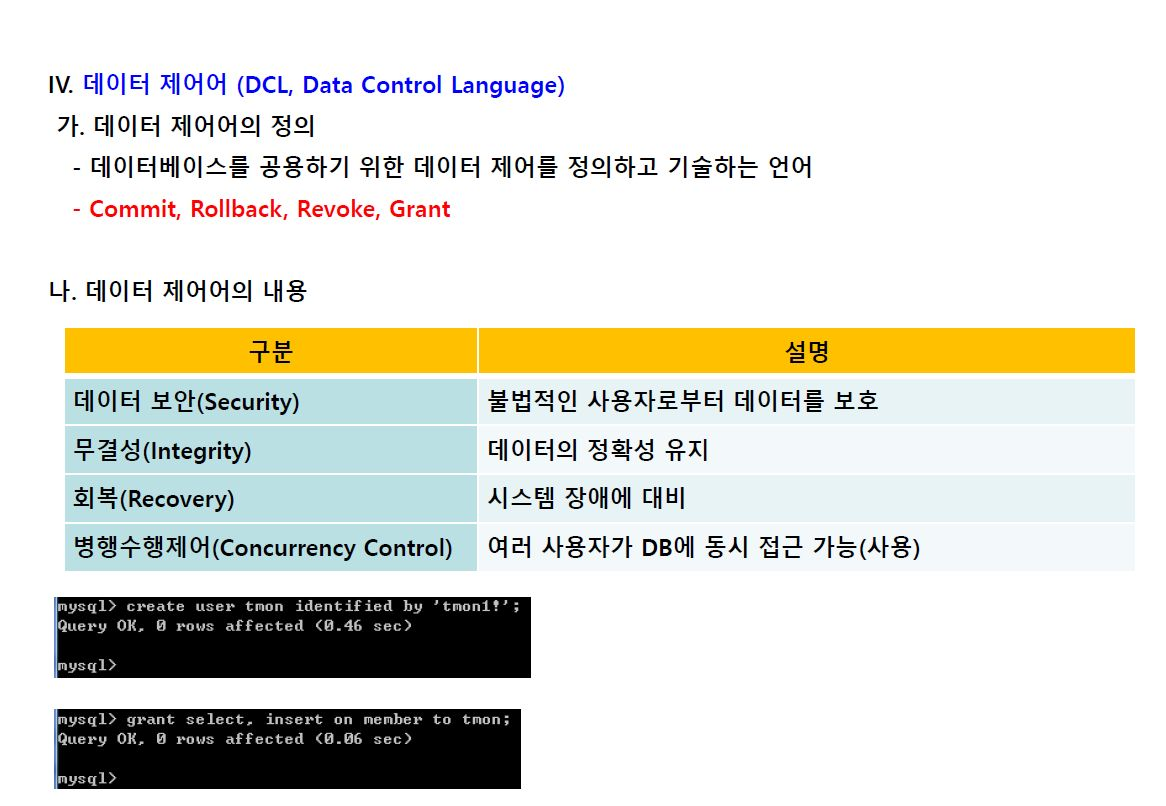

### SQLite 활용

- Python파이썬에서 SQLite3 기본으로 제공하기 때문에 특별한 작업없이 import 통해 바로 사용가능
- SQLite  : https://www.sqlite.org/index.html , 
- 관련문서 : https://docs.python.org/ko/3/library/sqlite3.html , https://wikidocs.net/5332
- 기타 : SQLite 쉽게 확인할 수 있는 DB Browser 도구 https://sqlitebrowser.org/dl/

In [1]:
import sqlite3

In [2]:
sqlite3.sqlite_version

'3.38.2'

In [3]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
print(conn)

#### sqlite3 데이터베이스 CRUD (Create, Read, Update, Delete ) 
 - sqlite3.connect() 로 데이터베이스 연결객체 Conn 생성 
 - Conn 객체의 cursor() 메소드를 이용, Cursor 객체 생성
 - Cursor 객체의 execute() 메소드를 이용하여 SQL 구문 실행
 - Conn 객체의 commit() 메소드를 이용하여 최종 내용 데이터베이스에 반영 (commit, rollback 개념 참고 )
 - Conn 데이터베이스 연결 closed (종료)
 

In [4]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db') #, isolation_level=None)

In [5]:
# cursor 객체 생성
cursor = conn.cursor()

In [8]:
# cursor 객체를 이용, SQL 구문 실행: 테이블 생성
cursor.execute('''CREATE TABLE contact(name TEXT, age INT, email TEXT)''')

In [9]:
# 테이블 조회
cursor.execute('''select 
                    * 
                    from 
                    contact''')
cursor.fetchall()

[]

In [10]:
# conn 객체를 이용, SQL 작성 사례: 테이블 삭제
cursor.execute("DROP TABLE contact")

In [11]:
# conn 객체를 통해 SQL 작성 사례
cursor.execute("CREATE TABLE contact(name text, age int, email text)")

In [12]:
# 생성된 테이블에 데이터 입력 
conn.execute("INSERT INTO contact VALUES('kim', 20, 'kim@megait.edu')")

In [13]:
conn.execute("INSERT INTO contact VALUES('lee', 40, 'lee@macademy.org')")

In [14]:
conn.execute("INSERT INTO contact VALUES('park', 60, 'park@daum.net')")

In [15]:
# 테이블 조회
cursor.execute('''select * from contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net')]

In [16]:
input_data = (
    ('홍', 25, 'hong@naver.com'),
    ('강', 34, 'kang@yes.kr'),
    ('진', 56, 'jin@mail.com'),
)

sql = "INSERT INTO contact(name, age, email) values (?, ?, ?)"

cursor.executemany(sql, input_data)

In [17]:
# 테이블 조회
cursor.execute('''select * from contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [18]:
# Commit 을 수행하지 않으면 데이터베이스에 최종 반영되지 않음
conn.commit()

In [19]:
# 취소하려면 rollback 수행
conn.rollback()

In [20]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### sqlite3 데이터베이스 데이터 조회
 - sqlite3.connect() 로 데이터베이스 연결객체 Conn 생성 
 - Conn 객체의 cursor() 메소드를 이용, Cursor 객체 생성
 - Cursor 객체의 execute() 메소드를 이용하여 SQL 구문(SELECT 등) 실행
 - Conn 데이터베이스 연결 closed (종료)
 

In [21]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')

In [22]:
# cursor 객체 생성
cursor = conn.cursor()

In [23]:
# SQL 구문으로 데이터 조회 사례1 (리스트 형태)
cursor.execute('''SELECT * FROM contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [24]:
cursor.execute('''SELECT * FROM contact''')

In [25]:
cursor.fetchone()

('kim', 20, 'kim@megait.edu')

In [26]:
# SQL 구문으로 데이터 조회 사례2 (튜플 형태)
cursor.execute("SELECT * FROM contact")
for row in cursor:
    print(row)

('kim', 20, 'kim@megait.edu')
('lee', 40, 'lee@macademy.org')
('park', 60, 'park@daum.net')
('홍', 25, 'hong@naver.com')
('강', 34, 'kang@yes.kr')
('진', 56, 'jin@mail.com')


In [27]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### sqlite3 데이터베이스 구문파라미터 활용
 - ? 활용
 - : 활용

In [28]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
# cursor 객체 생성
cursor = conn.cursor()

In [29]:
cursor.execute("SELECT * FROM contact WHERE name=?",('lee',))   # 1개 tuple 형 값을 가질 때, 반드시 콤마(,) 를 붙임에 유의
cursor.fetchall()

[('lee', 40, 'lee@macademy.org')]

In [30]:
user_name = 'park'

cursor.execute("SELECT * FROM contact WHERE name=:name",        # Dictionay 형태 활용
               {'name': user_name})
cursor.fetchall()

[('park', 60, 'park@daum.net')]

In [31]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### sqlite3 데이터베이스 수정 및 삭제
 - UPDATE
 - DELETE

In [32]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
# cursor 객체 생성
cursor = conn.cursor()

In [33]:
cursor.execute("UPDATE contact SET name='seo' WHERE email='lee@macademy.org'")

In [34]:
cursor.execute("SELECT * FROM contact")
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('seo', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [35]:
cursor.execute("DELETE FROM contact WHERE email='lee@macademy.org'")

In [36]:
cursor.execute("SELECT * FROM contact")
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [37]:
#conn.commit()

In [38]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### Oracle 연결 예: 
 - Command 화면에서 : conda install cx_Oracle
   또는
 - !pip install cx_Oracle
 - 참조사이트 : https://pypi.org/project/cx_Oracle/

- cx_Oracle.makedsn(host, port, sid=None)    
   `#` host ip 또는 이름, port 1521 기본값, sid 설치때 확인가능
- cx_Oracle.connect(usser=scott, password=tiger, dsn=None)  
   `#` user 사용자ID, passsword 패스워드, dsn 앞에서 생성한 정보
   

In [39]:
# 예시:
# oracle_dsn = cx_Oracle.makedsn(host='10.34.34.123', port='1521', sid='xe')
# conn = cx_Oracle.connect(usser='scott', password='tiger', dsn=oracle_dsn)

### 실습 (1) 주식 데이터 수집 및 DB 적재
 - yahoo 에서 제공하는 주식데이터를 읽어와서 DataFrame 에 저장
 - sqlite db 에 테이블에 데이터 넣어보기

In [46]:
#!pip install pandas-datareader

In [47]:
import sqlite3
import pandas as pd
import pandas_datareader as pdr

In [56]:
pdr.DataReader('005930', 'naver')

Open   High    Low  Close    Volume
Date                                            
2018-07-23  47100  47200  46150  46500  10823782
2018-07-24  46350  46600  45950  46150   8261363
2018-07-25  46250  46550  45900  46150   7222471
2018-07-26  46100  47000  46000  46900   7374946
2018-07-27  46450  47000  46450  46900   4762460
...           ...    ...    ...    ...       ...
2023-07-17  73200  73500  72800  73300  10060049
2023-07-18  73200  73500  72000  72000  11697900
2023-07-19  72700  72800  71300  71700  10896412
2023-07-20  71100  71500  70800  71000   9732730
2023-07-21  70400  70400  69400  70300  16496206

[1234 rows x 5 columns]

In [58]:
pdr.DataReader('005930', 'naver', pd.to_datetime('2021-01-01'), '2021-12-31')

Open   High    Low  Close    Volume
Date                                            
2021-01-04  81000  84400  80200  83000  38655276
2021-01-05  81600  83900  81600  83900  35335669
2021-01-06  83300  84500  82100  82200  42089013
2021-01-07  82800  84200  82700  82900  32644642
2021-01-08  83300  90000  83000  88800  59013307
...           ...    ...    ...    ...       ...
2021-12-24  80200  80800  80200  80500  12086380
2021-12-27  80600  80600  79800  80200  10783368
2021-12-28  80200  80400  79700  80300  18226325
2021-12-29  80200  80200  78500  78800  19794795
2021-12-30  78900  79500  78100  78300  14236700

[248 rows x 5 columns]

In [59]:
df = pdr.DataReader('005930', 'naver', pd.to_datetime('2021-01-01'), '2021-12-31')

In [60]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [61]:
df

Open   High    Low  Close    Volume
Date                                            
2021-01-04  81000  84400  80200  83000  38655276
2021-01-05  81600  83900  81600  83900  35335669
2021-01-06  83300  84500  82100  82200  42089013
2021-01-07  82800  84200  82700  82900  32644642
2021-01-08  83300  90000  83000  88800  59013307
...           ...    ...    ...    ...       ...
2021-12-24  80200  80800  80200  80500  12086380
2021-12-27  80600  80600  79800  80200  10783368
2021-12-28  80200  80400  79700  80300  18226325
2021-12-29  80200  80200  78500  78800  19794795
2021-12-30  78900  79500  78100  78300  14236700

[248 rows x 5 columns]

In [62]:
# SQLite 넣기 위한 사전작업
# 1) Conn, 2) Cur, 3) Query(INSERT), 4) Commit, Close
conn = sqlite3.connect('data/kospi-test.db')

In [63]:
cur = conn.cursor()

In [64]:
df

Open   High    Low  Close    Volume
Date                                            
2021-01-04  81000  84400  80200  83000  38655276
2021-01-05  81600  83900  81600  83900  35335669
2021-01-06  83300  84500  82100  82200  42089013
2021-01-07  82800  84200  82700  82900  32644642
2021-01-08  83300  90000  83000  88800  59013307
...           ...    ...    ...    ...       ...
2021-12-24  80200  80800  80200  80500  12086380
2021-12-27  80600  80600  79800  80200  10783368
2021-12-28  80200  80400  79700  80300  18226325
2021-12-29  80200  80200  78500  78800  19794795
2021-12-30  78900  79500  78100  78300  14236700

[248 rows x 5 columns]

In [65]:
df.to_sql('samsung', conn, if_exists='replace')

248

#### 방법1:

In [66]:
cur.execute("SELECT * FROM samsung")

In [67]:
#cur.fetchall()
cur.fetchone()

('2021-01-04 00:00:00', '81000', '84400', '80200', '83000', '38655276')

In [68]:
df = pd.DataFrame(cur.fetchall())
df

0      1      2      3      4         5
0    2021-01-05 00:00:00  81600  83900  81600  83900  35335669
1    2021-01-06 00:00:00  83300  84500  82100  82200  42089013
2    2021-01-07 00:00:00  82800  84200  82700  82900  32644642
3    2021-01-08 00:00:00  83300  90000  83000  88800  59013307
4    2021-01-11 00:00:00  90000  96800  89500  91000  90306177
..                   ...    ...    ...    ...    ...       ...
242  2021-12-24 00:00:00  80200  80800  80200  80500  12086380
243  2021-12-27 00:00:00  80600  80600  79800  80200  10783368
244  2021-12-28 00:00:00  80200  80400  79700  80300  18226325
245  2021-12-29 00:00:00  80200  80200  78500  78800  19794795
246  2021-12-30 00:00:00  78900  79500  78100  78300  14236700

[247 rows x 6 columns]

#### 방법 2:

In [69]:
read_df = pd.read_sql("SELECT * FROM samsung", conn, index_col='Date')
read_df

Open   High    Low  Close    Volume
Date                                                     
2021-01-04 00:00:00  81000  84400  80200  83000  38655276
2021-01-05 00:00:00  81600  83900  81600  83900  35335669
2021-01-06 00:00:00  83300  84500  82100  82200  42089013
2021-01-07 00:00:00  82800  84200  82700  82900  32644642
2021-01-08 00:00:00  83300  90000  83000  88800  59013307
...                    ...    ...    ...    ...       ...
2021-12-24 00:00:00  80200  80800  80200  80500  12086380
2021-12-27 00:00:00  80600  80600  79800  80200  10783368
2021-12-28 00:00:00  80200  80400  79700  80300  18226325
2021-12-29 00:00:00  80200  80200  78500  78800  19794795
2021-12-30 00:00:00  78900  79500  78100  78300  14236700

[248 rows x 5 columns]

In [70]:
conn.close()

### 실습 (2) DB 활용: SQLite 기준

In [71]:
import pandas as pd
import sqlite3

In [72]:
connection = sqlite3.connect('data/pandas-transaction.db')
#connection = sqlite3.connect('data/pandas-transaction.db')
connection

### sqlite_master : 메타 데이터 테이블

In [73]:
query = "select * from 'sqlite_master'"       # 해당 DB에서 전체 Master 되는 Table 들 조회시 사용
pd.read_sql(query, connection)

type         name     tbl_name  rootpage  \
0  table  transaction  transaction         2   
1  table      product      product         4   
2  table         user         user         3   

                                                 sql  
0  CREATE TABLE "transaction" (\n"Name" TEXT,\n  ...  
1  CREATE TABLE "product" (\n"product" TEXT,\n  "...  
2  CREATE TABLE "user" (\n"Name" TEXT,\n  "Age" I...

In [74]:
print(pd.read_sql(query, connection)['sql'][0])

CREATE TABLE "transaction" (
"Name" TEXT,
  "date" TEXT,
  "amount" INTEGER,
  "product" TEXT,
  "result" TEXT
)


#### SELECT  [컬럼명]  FROM [ '테이블명' ]  WHERE  [조건]  ORDER BY  [정렬조건]  LIMIT [가져올Record수]
#### SQL 는 대소문자 무관함

In [75]:
query = "select * from 'transaction'"         
# transaction은 DB 의 예약어 keyword이므로 ' ' 로 묶은 것은 Table 이름이기 때문임

pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Choi  2017-01-05     800   apple  confirmed
3  Park  2017-01-07     500  cereal   canceled
4  Kang  2017-01-08    1200    kiwi  confirmed
5  Choi  2017-01-09     100   melon  confirmed
6   Lee  2017-01-09     700  banana  confirmed
7  Yoon  2017-01-10     200  cereal   canceled

In [76]:
transaction = pd.read_sql(query, connection)
transaction

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Choi  2017-01-05     800   apple  confirmed
3  Park  2017-01-07     500  cereal   canceled
4  Kang  2017-01-08    1200    kiwi  confirmed
5  Choi  2017-01-09     100   melon  confirmed
6   Lee  2017-01-09     700  banana  confirmed
7  Yoon  2017-01-10     200  cereal   canceled

### pandas DataFrame  vs. SQL 결과 비교 (예)

In [77]:
transaction[['product','amount']].head(5)

product  amount
0   apple     500
1  banana     700
2   apple     800
3  cereal     500
4    kiwi    1200

In [78]:
query = "select product, amount from 'transaction' limit 5"
pd.read_sql(query, connection)

product  amount
0   apple     500
1  banana     700
2   apple     800
3  cereal     500
4    kiwi    1200

### 정렬하기 : pandas DataFrame  vs. SQL 결과 비교 (예)

In [79]:
transaction.sort_values(by='amount', ascending=False).head(5)     
# 오름차순 ascending=True 가 기본값임; sort_values(by='amount', acending=True)

Name        date  amount product     result
4  Kang  2017-01-08    1200    kiwi  confirmed
2  Choi  2017-01-05     800   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
6   Lee  2017-01-09     700  banana  confirmed
0  Kang  2017-01-01     500   apple  confirmed

In [80]:
query = "select * from 'transaction' order by amount desc"   
# ASC 오름차순(순차정렬),     DESC 내림차순(역순정렬)
pd.read_sql(query, connection).head(5)

Name        date  amount product     result
0  Kang  2017-01-08    1200    kiwi  confirmed
1  Choi  2017-01-05     800   apple  confirmed
2   Kim  2017-01-03     700  banana  confirmed
3   Lee  2017-01-09     700  banana  confirmed
4  Kang  2017-01-01     500   apple  confirmed

In [81]:
# 상위 Top 표시 옵션 : 
query = "select * from 'transaction' order by amount desc limit 5"   # LIMIT n  상위 n 개 표시
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-08    1200    kiwi  confirmed
1  Choi  2017-01-05     800   apple  confirmed
2   Kim  2017-01-03     700  banana  confirmed
3   Lee  2017-01-09     700  banana  confirmed
4  Kang  2017-01-01     500   apple  confirmed

####  SQL 줄바꾸기 tip :  " " "  을 사용함

In [82]:
       #"""
query = '''      
    select *
    from 'transaction'
    order by amount desc
    limit 5
'''              
#"""
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-08    1200    kiwi  confirmed
1  Choi  2017-01-05     800   apple  confirmed
2   Kim  2017-01-03     700  banana  confirmed
3   Lee  2017-01-09     700  banana  confirmed
4  Kang  2017-01-01     500   apple  confirmed

#### EQUAL ( == )

In [83]:
transaction[transaction['product'] == 'banana']        # pandas 통해서 실습결과

Name        date  amount product     result
1  Kim  2017-01-03     700  banana  confirmed
6  Lee  2017-01-09     700  banana  confirmed

In [84]:
query = """                                         
select *
from 'transaction'
where product = 'banana' and Name = 'Lee'
"""
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

Name        date  amount product     result
0  Lee  2017-01-09     700  banana  confirmed

####  NOT EQUAL ( <> )

In [85]:
transaction[transaction['product'] != 'banana']        # pandas 통해서 실습결과

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
2  Choi  2017-01-05     800   apple  confirmed
3  Park  2017-01-07     500  cereal   canceled
4  Kang  2017-01-08    1200    kiwi  confirmed
5  Choi  2017-01-09     100   melon  confirmed
7  Yoon  2017-01-10     200  cereal   canceled

In [86]:
query = """                                         
select *
from 'transaction'
where product <> 'banana'
"""
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1  Choi  2017-01-05     800   apple  confirmed
2  Park  2017-01-07     500  cereal   canceled
3  Kang  2017-01-08    1200    kiwi  confirmed
4  Choi  2017-01-09     100   melon  confirmed
5  Yoon  2017-01-10     200  cereal   canceled

#### BETWEEN

In [87]:
transaction[(transaction['amount'] >= 400) & (transaction['amount'] <= 500)]
#transaction[(transaction['amount'] >= 400) & (transaction['amount'] <= 500) & (transaction['product'] == 'banana')]

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
3  Park  2017-01-07     500  cereal   canceled

In [88]:
query = """                                         
select *
from 'transaction'
where amount >= 400 and amount <= 500
"""
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1  Park  2017-01-07     500  cereal   canceled

In [89]:
query = """                                         
select *
from 'transaction'
where amount between 400 and 500
"""
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1  Park  2017-01-07     500  cereal   canceled

#### BETWEEN 2

In [90]:
query = """                                         
    select *
    from 'transaction'
    where amount between 400 and 500
          and product <> 'apple'
    order by amount desc
"""
pd.read_sql(query, connection)

Name        date  amount product    result
0  Park  2017-01-07     500  cereal  canceled

In [91]:
query = """                                         
    select *
    from 'transaction'
    where amount between 400 and 500
        and product <> 'banana'
    order by amount desc
    limit 1
"""
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed

#### IN

In [92]:
transaction[transaction['product'].isin(['cereal','kiwi','melon'])]        # pandas 통해서 실습결과

Name        date  amount product     result
3  Park  2017-01-07     500  cereal   canceled
4  Kang  2017-01-08    1200    kiwi  confirmed
5  Choi  2017-01-09     100   melon  confirmed
7  Yoon  2017-01-10     200  cereal   canceled

In [93]:
query = """                                         
    select *
    from 'transaction'
    where product in ('cereal','kiwi','melon')
"""
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

Name        date  amount product     result
0  Park  2017-01-07     500  cereal   canceled
1  Kang  2017-01-08    1200    kiwi  confirmed
2  Choi  2017-01-09     100   melon  confirmed
3  Yoon  2017-01-10     200  cereal   canceled

#### NOT IN

In [94]:
transaction[~transaction['product'].isin(['cereal','kiwi','melon'])]        # pandas 통해서 실습결과

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Choi  2017-01-05     800   apple  confirmed
6   Lee  2017-01-09     700  banana  confirmed

In [95]:
query = """                                         
    select *
    from 'transaction'
    where product not in ('cereal','kiwi','melon')
"""
pd.read_sql(query, connection)

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Choi  2017-01-05     800   apple  confirmed
3   Lee  2017-01-09     700  banana  confirmed

#### LIKE   :   % str %    SQL 은 대소문자 구분없음  but,  Python 은 대/소문자 구별함

In [96]:
transaction[transaction['Name'].str.contains("k")]       # pandas 통해서 실습결과 :  소문자 k  경우,

Name        date  amount product    result
3  Park  2017-01-07     500  cereal  canceled

In [97]:
transaction[transaction['Name'].str.contains("K")]       # pandas 통해서 실습결과;  대문자 K 경우,

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
4  Kang  2017-01-08    1200    kiwi  confirmed

In [98]:
query = """                                         
    select *
    from 'transaction'
    where Name like 'k%'
"""
pd.read_sql(query, connection).head(10)                # SQL 을 통해 실습결과

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Kang  2017-01-08    1200    kiwi  confirmed

#### JOIN

In [99]:
# 개별 table 읽어들이기

In [100]:
query = """                                         
    select *
    from 'transaction'
"""
transaction = pd.read_sql(query, connection)
transaction

Name        date  amount product     result
0  Kang  2017-01-01     500   apple  confirmed
1   Kim  2017-01-03     700  banana  confirmed
2  Choi  2017-01-05     800   apple  confirmed
3  Park  2017-01-07     500  cereal   canceled
4  Kang  2017-01-08    1200    kiwi  confirmed
5  Choi  2017-01-09     100   melon  confirmed
6   Lee  2017-01-09     700  banana  confirmed
7  Yoon  2017-01-10     200  cereal   canceled

In [101]:
query = """                                         
    select *
    from 'user'
"""
user = pd.read_sql(query, connection)
user

Name  Age     Sex                email
0  Kang   30    male       kang@gmail.com
1   Kim   22  female        kim@naver.com
2  Park   37    male  park@dsschool.co.kr
3   Lee   15  female      lee@empas.co.kr
4   Son   29    male     son@google.co.uk
5  Moon   40  female     moon@hanmail.com
6  Choi   34    male       choi@yahoo.com

In [102]:
query = """                                         
    select *
    from 'product'
"""
product = pd.read_sql(query, connection)
product

product  price
0      apple    5.0
1  blueberry    7.0
2     banana    2.5
3     cereal    4.5
4       kiwi   10.0
5      melon   12.5
6  pineapple   15.0

### Join 연결

참고 : https://pearlluck.tistory.com/46

In [103]:
df = transaction.merge(user, how='left')        # pandas 통해서 실습결과 
#df
df[['Name','result','Age']]

Name     result   Age
0  Kang  confirmed  30.0
1   Kim  confirmed  22.0
2  Choi  confirmed  34.0
3  Park   canceled  37.0
4  Kang  confirmed  30.0
5  Choi  confirmed  34.0
6   Lee  confirmed  15.0
7  Yoon   canceled   NaN

In [104]:
query = """                                         
    select A.Name, A.result, B.Age
    from 'transaction' A LEFT OUTER JOIN 'user' B
    ON A.Name = B.Name
"""
pd.read_sql(query, connection)                  
# RIGHT join 은 지원하지 않기 때문에, JOIN 테이블 순서를 바꾸면 됨

Name     result   Age
0  Kang  confirmed  30.0
1   Kim  confirmed  22.0
2  Choi  confirmed  34.0
3  Park   canceled  37.0
4  Kang  confirmed  30.0
5  Choi  confirmed  34.0
6   Lee  confirmed  15.0
7  Yoon   canceled   NaN

In [105]:
df = transaction.merge(user, how='inner')        # pandas 통해서 실습결과 
#df
df[['Name','result','Age']]

Name     result  Age
0  Kang  confirmed   30
1  Kang  confirmed   30
2   Kim  confirmed   22
3  Choi  confirmed   34
4  Choi  confirmed   34
5  Park   canceled   37
6   Lee  confirmed   15

In [106]:
query = """                                         
    select A.Name, A.result, B.Age
    from 'transaction' A INNER JOIN 'user' B
    ON A.Name = B.Name
"""
pd.read_sql(query, connection)                 # inner

Name     result  Age
0  Kang  confirmed   30
1   Kim  confirmed   22
2  Choi  confirmed   34
3  Park   canceled   37
4  Kang  confirmed   30
5  Choi  confirmed   34
6   Lee  confirmed   15

###   [참고] SQLAlchemy 소개

참고 : https://ulfrid.github.io/python/python-sqlalchemy/

SQLAlchemy는 ORM `(Object Relational Mapping, 객체-관계 매핑)` 으로 수많은 DB를 파이썬만으로 제어할 수 있도록 도주는 도구.
이 때문에, 실제 프로젝트에서 많이 응용되고 있습니다.

SQLAlchemy 및 ORM 주요특성 : 
- 객체와 관계형 데이터베이스의 데이터를 자동으로 연결
- SQLAlchemy를 이용해 DBMS에 종속적이지 않은 프로그래밍을 진행 가능
- SQLAlchemy의 장점(SQLite, MySQL, Oracle 등 다양한 DBAPI / 데이터베이스와 연동할 수 있고, 일관된 문법을 사용할 수 있음)

실습 데이터 Link : http://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

In [107]:
# SQLAlchemy 설치 :  
#!conda install -c anaconda sqlalchemy -y   

In [108]:
import pandas as pd
import sqlalchemy as db

In [109]:
# 연동할 DB를 설정
engine = db.create_engine('sqlite:///data/chinook.db')

In [110]:
engine

Engine(sqlite:///data/chinook.db)

In [111]:
conn = engine.connect()

In [112]:
meta = db.MetaData()   #SQLite Cursor 와 비슷한 개념

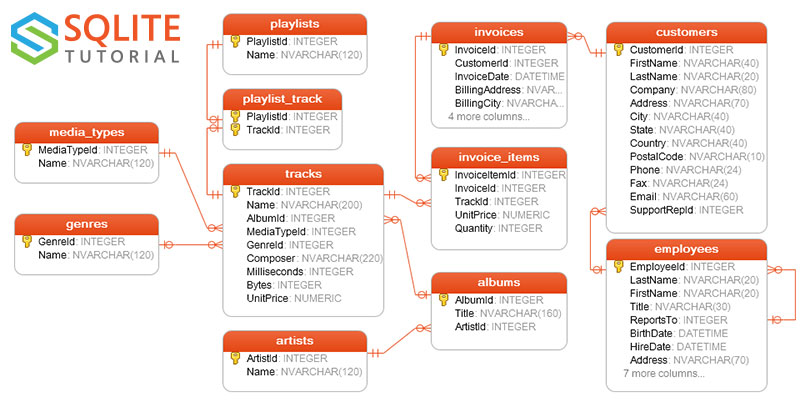

In [113]:
customers = db.Table('customers', meta, autoload=True, autoload_with=engine)

In [114]:
invoices = db.Table('invoices', meta, autoload=True, autoload_with=engine)

In [115]:
print(customers.columns.keys())

['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']


In [116]:
print(invoices.columns.keys())

['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']


In [117]:
query = db.select([customers])  # SQLite : SELECT * FROM customers
#resultproxy
resultproxy = conn.execute(query)

In [118]:
result = resultproxy.fetchall()

In [119]:
resultproxy.close()

In [120]:
result[:3]

[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3),
 (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5),
 (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3)]

In [121]:
a = result[0]

In [122]:
a.items()

C:\Users\salix\AppData\Local\Temp\ipykernel_19564\526460222.py:1: SADeprecationWarning: The LegacyRow.items() method is deprecated and will be removed in a future release.  Use the Row._mapping attribute, i.e., 'row._mapping.items()'. (deprecated since: 1.4)
  a.items()


[('CustomerId', 1),
 ('FirstName', 'Luís'),
 ('LastName', 'Gonçalves'),
 ('Company', 'Embraer - Empresa Brasileira de Aeronáutica S.A.'),
 ('Address', 'Av. Brigadeiro Faria Lima, 2170'),
 ('City', 'São José dos Campos'),
 ('State', 'SP'),
 ('Country', 'Brazil'),
 ('PostalCode', '12227-000'),
 ('Phone', '+55 (12) 3923-5555'),
 ('Fax', '+55 (12) 3923-5566'),
 ('Email', 'luisg@embraer.com.br'),
 ('SupportRepId', 3)]

In [123]:
a.keys()

RMKeyView(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId'])

In [124]:
a.values()

C:\Users\salix\AppData\Local\Temp\ipykernel_19564\3214226340.py:1: SADeprecationWarning: The LegacyRow.values() method is deprecated and will be removed in a future release.  Use the Row._mapping attribute, i.e., 'row._mapping.values()'. (deprecated since: 1.4)
  a.values()


[1,
 'Luís',
 'Gonçalves',
 'Embraer - Empresa Brasileira de Aeronáutica S.A.',
 'Av. Brigadeiro Faria Lima, 2170',
 'São José dos Campos',
 'SP',
 'Brazil',
 '12227-000',
 '+55 (12) 3923-5555',
 '+55 (12) 3923-5566',
 'luisg@embraer.com.br',
 3]

In [125]:
result[0].keys()

RMKeyView(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId'])

In [126]:
df = pd.DataFrame(result, columns=result[0].keys())

In [127]:
df.head(3)

CustomerId FirstName   LastName  \
0           1      Luís  Gonçalves   
1           2    Leonie     Köhler   
2           3  François   Tremblay   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   

                           Address                 City State  Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP   Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None  Germany   
2                1498 rue Bélanger             Montréal    QC   Canada   

  PostalCode               Phone                 Fax                  Email  \
0  12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   luisg@embraer.com.br   
1      70174    +49 0711 2842222                None  leonekohler@surfeu.de   
2    H2G 1A7   +1 (514) 721-4711                None    ftremblay@gmail.com   

   SupportRepId  
0             3  
1             5  
2             3

In [128]:
# Where 조건 방법:
query = db.select([customers]).where(customers.columns.Country == 'Brazil')
# SQLite : SELECT * FROM customers WHERE Contry == 'Brazil'
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(3)

CustomerId  FirstName   LastName  \
0           1       Luís  Gonçalves   
1          10    Eduardo    Martins   
2          11  Alexandre      Rocha   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                  Woodstock Discos   
2                              Banco do Brasil S.A.   

                           Address                 City State Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
1        Rua Dr. Falcão Filho, 155            São Paulo    SP  Brazil   
2               Av. Paulista, 2022            São Paulo    SP  Brazil   

  PostalCode               Phone                 Fax  \
0  12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   
1  01007-010  +55 (11) 3033-5446  +55 (11) 3033-4564   
2  01310-200  +55 (11) 3055-3278  +55 (11) 3055-8131   

                      Email  SupportRepId  
0      luisg@embraer.com.br             3  
1  eduardo@woodstock.com.br             4  
2          alero@uol.com.br             5

In [129]:
# AND, OR 활용법:  db.and_    db.or_
query = db.select([customers]).where(db.and_(customers.columns.Country == 'USA',
                                    customers.columns.State == 'CA'))
# SQLite : SELECT * FROM customers WHERE Contry == 'USA' AND State == 'CA'
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(3)

CustomerId FirstName LastName      Company                    Address  \
0          16     Frank   Harris  Google Inc.  1600 Amphitheatre Parkway   
1          19       Tim    Goyer   Apple Inc.            1 Infinite Loop   
2          20       Dan   Miller         None       541 Del Medio Avenue   

            City State Country  PostalCode              Phone  \
0  Mountain View    CA     USA  94043-1351  +1 (650) 253-0000   
1      Cupertino    CA     USA       95014  +1 (408) 996-1010   
2  Mountain View    CA     USA   94040-111  +1 (650) 644-3358   

                 Fax                Email  SupportRepId  
0  +1 (650) 253-0000   fharris@google.com             4  
1  +1 (408) 996-1011     tgoyer@apple.com             3  
2               None  dmiller@comcast.com             4

In [130]:
# ORDER BY 활용 방법: db.asc(오름차순), db.desc(내림차순)
query = db.select([customers.columns.FirstName, customers.columns.LastName]).order_by(db.asc(customers.columns.LastName))
# SQLite : SELECT FirstName, LastName FROM customers ORDER BY asc
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(5)

FirstName LastName
0   Roberto  Almeida
1     Julia  Barnett
2   Camille  Bernard
3  Michelle   Brooks
4    Robert    Brown

In [131]:
# GROUP BY 사용: db.func.sum(), 
query = db.select([invoices.columns.BillingCountry, db.func.sum(invoices.columns.Total).label('CountryTotal')]).group_by(invoices.columns.BillingCountry)
# SQLite : SELECT * FROM invoices
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(10)

C:\Users\salix\AppData\Local\Temp\ipykernel_19564\392134812.py:4: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  resultproxy = conn.execute(query)


BillingCountry CountryTotal
0       Argentina        37.62
1       Australia        37.62
2         Austria        42.62
3         Belgium        37.62
4          Brazil       190.10
5          Canada       303.96
6           Chile        46.62
7  Czech Republic        90.24
8         Denmark        37.62
9         Finland        41.62

#### SQLAlchemy 에서 Oracle 연결 사례 : 

from sqlalchemy import create_engine
import cx_Oracle

host=hostname
port=port
sid='sid'
user='username'
password='password'
sid = cx_Oracle.makedsn(host, port, sid=sid)

cstr = 'oracle://{user}:{password}@{sid}'.format(
    user=user,
    password=password,
    sid=sid
)

engine =  create_engine(
    cstr,
    convert_unicode=False,
    pool_recycle=10,
    pool_size=50,
    echo=True
)

result = engine.execute('select * from TABLE')

for row in result:
    print row
 